---
title: Optimal Decision Making
author: Daniela Delgado
date: '2024-02-20'
image: "image.jpg"
description: "Training data to predict if a person will default on a loan by finding a threshold using a LogisticRegression model!"
format: html
---

# **Introduction**

- In this blog post, I start off by making different graphs and tables to see if there is any correlation and patterns between a person's information and seeing how the interest rate is affected by this information. Then, I used logistic regression to construct a score function and threshold for predicting whether a prospective borrower is likely to default on a given loan. Looping through the max and min scores, I found the best threshold to maximize the bank's profit by calculating how much the bank will gain or lose based on if the person with that score defaults or not from paying the loan. In my test results, I got that the best threshold was about -0.175 with the bank’s expected profit per borrower to be about $1168.39.

- In seeing if certain groups have more difficulty than others in getting a loan because of defaulting based on the threshold proposed from the system, all of the borrowers have a decision, or probability, of defaulting based on the threshold. There might be an error or missing step in my calculations. 

# Part A: Grab the Data

In [203]:
# downloading training data

import pandas as pd

url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/credit-risk/train.csv"
df_train = pd.read_csv(url)

In [204]:
df_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,25,43200,RENT,NaN,VENTURE,B,1200,9.91,0,0.03,N,4
1,27,98000,RENT,3.0,EDUCATION,C,11750,13.47,0,0.12,Y,6
2,22,36996,RENT,5.0,EDUCATION,A,10000,7.51,0,0.27,N,4
3,24,26000,RENT,2.0,MEDICAL,C,1325,12.87,1,0.05,N,4
4,29,53004,MORTGAGE,2.0,HOMEIMPROVEMENT,A,15000,9.63,0,0.28,N,10


# Part B: Explore The Data


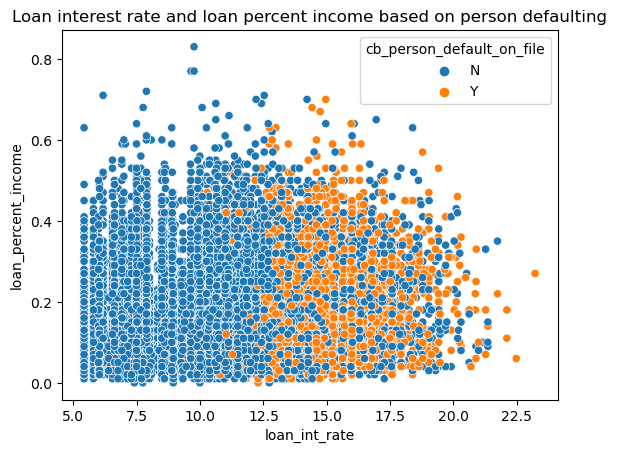

In [205]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.scatterplot(data = df_train, x = 'loan_int_rate', y = 'loan_percent_income', hue = 'cb_person_default_on_file')
plt.title("Loan interest rate and loan percent income based on person defaulting")
plt.show()

In this scatterplot, we can see the how the loan interest rate is affected by seeing if the person defaulted previously on a loan and the person's percent income. The loan interest rate increases if the person has a record of defaulting on a loan.

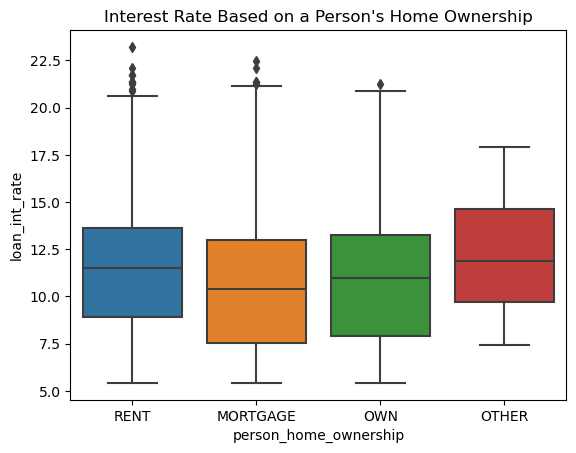

In [206]:
sns.boxplot(data = df_train, x = 'person_home_ownership', y = 'loan_int_rate')
plt.title("Interest Rate Based on a Person's Home Ownership")
plt.show()

This graph further explores how the loan interest rate differs and compares based on a person's home ownership. We can see that a person who has a mortgage has a lower mean for the interest rate, while a person renting and those with other forms of home ownership have higher loan interest rates on average.

In [207]:
meanTable = df_train.groupby(['loan_intent', 'cb_person_default_on_file']).aggregate({'person_age': ['mean', 'std'], 'person_income' : ['mean', 'std'], 'cb_person_cred_hist_length' : ['mean', 'std'], 'loan_int_rate': ['mean', 'std']})
meanTable

person_age            \
                                                  mean       std   
loan_intent       cb_person_default_on_file                        
DEBTCONSOLIDATION N                          27.523949  5.822429   
                  Y                          27.883289  6.379513   
EDUCATION         N                          26.505755  6.058923   
                  Y                          27.047126  6.009493   
HOMEIMPROVEMENT   N                          29.088624  5.637893   
                  Y                          28.529730  5.966250   
MEDICAL           N                          27.927044  6.376993   
                  Y                          28.061628  6.322874   
PERSONAL          N                          28.361028  7.562245   
                  Y                          27.933244  6.696901   
VENTURE           N                          27.589281  6.216285   
                  Y                          27.585551  5.808216   

                                            person_income                 \
                                                     mean            std   
loan_intent       cb_person_default_on_file                                
DEBTCONSOLIDATION N                          66504.540596   54849.658619   
                  Y                          67551.327586   58425.810386   
EDUCATION         N                          64403.688983   40406.252292   
                  Y                          61127.258621   35589.171553   
HOMEIMPROVEMENT   N                          72891.920750   49281.092741   
                  Y                          73886.228829   52241.077202   
MEDICAL           N                          61528.271447   48179.985735   
                  Y                          60326.900000   59500.584963   
PERSONAL          N                          68244.272206  113892.066168   
                  Y                          67221.606142   57537.660727   
VENTURE           N                          65544.232157   46928.520701   
                  Y                          68787.400507   82746.627032   

                                            cb_person_cred_hist_length  \
                                                                  mean   
loan_intent       cb_person_default_on_file                              
DEBTCONSOLIDATION N                                           5.644276   
                  Y                                           5.928382   
EDUCATION         N                                           5.074231   
                  Y                                           5.471264   
HOMEIMPROVEMENT   N                                           6.512995   
                  Y                                           6.079279   
MEDICAL           N                                           5.912201   
                  Y                                           5.919767   
PERSONAL          N                                           6.190763   
                  Y                                           5.958611   
VENTURE           N                                           5.745882   
                  Y                                           5.735108   

                                                      loan_int_rate            
                                                  std          mean       std  
loan_intent       cb_person_default_on_file                                    
DEBTCONSOLIDATION N                          3.915509     10.216206  3.008325  
                  Y                          4.121033     14.565023  1.758878  
EDUCATION         N                          3.572837     10.273948  2.967930  
                  Y                          3.910798     14.357234  1.650609  
HOMEIMPROVEMENT   N                          3.964697     10.358453  3.158075  
                  Y                          3.974765     14.576099  1.739466  
MEDICAL           N                          4.0049

In this table, part of the data is summarized by finding the mean and the standard deviation of a person's age, their income, their credit history length, and their given loan interest rate based on their loan intent and whether or not they defaulted previously on a loan. This table is helpful as we can see what factors play into having a higher interest rate, and we can see how age, income, or their credit history length varies based on defaulting on a loan and their loan intent. The standard deviation is important to see how much of the data falls into or out of the calculated mean.

# Part C: Building a Model:

Construct a score function and threshold for predicting whether a prospective borrower is likely to default on a given loan. You may use all the features in the data except loan_grade and the target variable loan_status.

In [208]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_train["loan_status"]) #fit encoder on 'loan_status'

def prepare_data(df):
  #removing columns that are not needed
  df = df.drop(["loan_grade"], axis = 1)
  #removing N/A labels
  df = df.dropna()
  #print(df)
  #turns the labels in 'loan_status' to a number
  y = le.transform(df["loan_status"])
  #print(y)
  #removing 'loan_status' col bc now held by y
  df = df.drop(["loan_status"], axis = 1)
  #converted into “one-hot encoded” 0-1 columns
  df = pd.get_dummies(df)
  return df, y


X_train, y_train = prepare_data(df_train)



In [311]:
y_train

array([0, 0, 1, ..., 0, 0, 1])

In [210]:
from itertools import combinations
from sklearn.model_selection import cross_val_score #use this isntead of for-loop
from sklearn.linear_model import LogisticRegression
import random

quant_cols = ['person_income', 'loan_amnt', 'loan_int_rate']

score_counter = 0

LR = LogisticRegression()

#using cross validation on LR to avoid overfitting
cv_scores_LR = cross_val_score(LR, X_train[quant_cols], y_train, cv = 5) #training on remaining 80% of data
if cv_scores_LR.mean() > score_counter:
      #updating the best score and columns of that score
      score_counter = cv_scores_LR.mean()

print('Best Score: ', score_counter)


Best Score:  0.8117172718507574


In [308]:
X_train

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y,paid_gain,default_loss,Scores,decision
1,27,98000,3.0,11750,13.47,0.12,6,False,False,False,...,False,False,False,False,False,True,4613.567568,-6997.533847,-2.724145,False
2,22,36996,5.0,10000,7.51,0.27,4,False,False,False,...,False,False,False,False,True,False,2044.334031,-6426.108799,-0.435472,False
3,24,26000,2.0,1325,12.87,0.05,4,False,False,False,...,False,True,False,False,True,False,493.650464,-795.445199,-0.913722,False
4,29,53004,2.0,15000,9.63,0.28,10,True,False,False,...,True,False,False,False,True,False,4028.690420,-9390.333437,-0.552180,False
6,21,21700,2.0,5500,14.91,0.25,2,False,False,False,...,True,False,False,False,True,False,2430.522429,-3211.752128,-0.294372,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26059,36,150000,8.0,3000,7.29,0.02,17,True,False,False,...,False,False,False,False,True,False,593.840622,-1932.967484,-5.766362,False
26060,23,48000,1.0,4325,5.42,0.09,4,False,False,False,...,False,False,False,True,True,False,623.093432,-2849.295748,-1.486665,False
26061,22,60000,0.0,15000,11.71,0.25,4,False,False,False,...,False,True,False,False,True,False,5017.300210,-9143.682505,-0.836032,False
26062,30,144000,12.0,35000,12.68,0.24,8,True,False,False,...,False,False,True,False,True,False,12819.204794,-21064.871625,-2.113038,False


In [211]:
y_train

array([0, 0, 1, ..., 0, 0, 1])

In [239]:
LR.fit(X_train[quant_cols], y_train)
w = LR.coef_
LR.score(X_train[quant_cols], y_train)



0.8080062862880342

In [240]:
w

array([[-4.05735976e-05,  1.06558819e-04,  9.49045880e-08]])

In [313]:
#finding the scores
x = X_train[quant_cols]
x

,person_income,loan_amnt,loan_int_rate
1,98000,11750,13.47
2,36996,10000,7.51
3,26000,1325,12.87
4,53004,15000,9.63
6,21700,5500,14.91
...,...,...,...
26059,150000,3000,7.29
26060,48000,4325,5.42
26061,60000,15000,11.71
26062,144000,35000,12.68


In [244]:
scores = x@w.T
scores

,0
1,-2.724145
2,-0.435472
3,-0.913722
4,-0.552180
6,-0.294372
...,...
26059,-5.766362
26060,-1.486665
26061,-0.836032
26062,-2.113038


# Part D: Finding a Threshold

Find a threshold that maximizes the bank's profit. 

In [316]:
import numpy as np

#calculate paid gain and loss here and add these array values in the columns of the table
#vectorization
int_rate_decimal = np.divide(X_train['loan_int_rate'], 100)
X_train['paid_gain'] = X_train['loan_amnt'] * (1 + 0.25 * int_rate_decimal)**10 - X_train['loan_amnt']
X_train['default_loss'] = X_train['loan_amnt'] * (1 + 0.25 * int_rate_decimal)** - 1.7 * X_train['loan_amnt']
X_train['Scores'] = scores


In [317]:
X_train['Scores']

1       -2.724145
2       -0.435472
3       -0.913722
4       -0.552180
6       -0.294372
           ...   
26059   -5.766362
26060   -1.486665
26061   -0.836032
26062   -2.113038
26063   -0.148728
Name: Scores, Length: 22907, dtype: float64

In [274]:
all_total_profit = []
best_profit = 0
total_t_profit = 0

for threshold in np.linspace(scores.min(), scores.max(), 100): #np.linspace(scores.min(), scores.max(), 100)
    #new col in for loop that makes the decision "decision col" checks if score is larger than threshold
    X_train['decision'] = X_train['Scores'] >= threshold[0] #returns bool threshold[0] with np.linspace


    t_profit = (1 - X_train['decision']) * (X_train['paid_gain'] * (1 - y_train) + X_train['default_loss'] * (y_train))

    # t_profit = (1-threshold) * (X_train['paid_gain'] + threshold * X_train['default_loss'])
    
    # print(f"{X_train['paid_gain']= }")
    # print(f"{X_train['default_loss']= }")

    #calculating mean profit
    all_total_profit.append(t_profit.mean())

    #return highest threshold based on highest gain
    if t_profit.mean() > best_profit:
        best_profit = t_profit.mean()
        best_t = threshold[0] #threshold[0] with np.linspace
        profit_per_borrower = t_profit.mean()


        #find probability and loop through thresholds
print(total_t_profit)
print('highest profit: ', best_profit)
print('best threshold that optimizes profit for the bank: ', best_t)
print('bank’s expected profit per borrower: ', profit_per_borrower)


0
highest profit:  1158.6189787929175
best threshold that optimizes profit for the bank:  -0.9466451695144542
bank’s expected profit per borrower:  1158.6189787929175


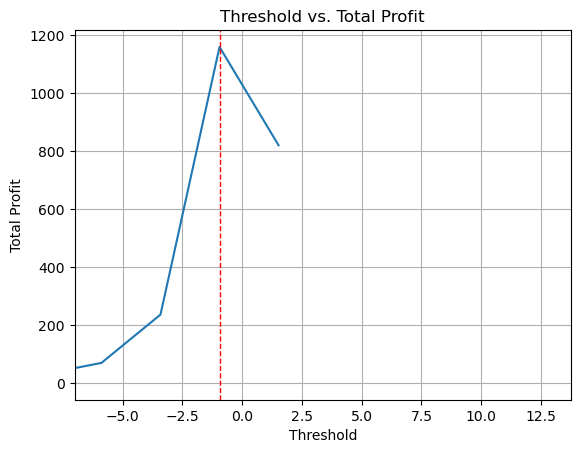

In [266]:
#threshold vs profit (all_total_profit)
plt.plot(np.linspace(scores.min(), scores.max(), 100), all_total_profit)
plt.gca().set(xlim=(-7,None))
plt.grid(True)
plt.axvline(x = best_t, color = 'red', linestyle = '--', lw = 1)
plt.xlabel("Threshold")
plt.ylabel("Total Profit")
plt.title("Threshold vs. Total Profit")
plt.show()



# Part E: Evaluate Your Model from the Bank’s Perspective


In [219]:
url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/credit-risk/test.csv"
df_test = pd.read_csv(url)

X_test, y_test = prepare_data(df_test)
LR.score(X_test[quant_cols], y_test)
x = X_test[quant_cols]
test_scores = x@w.T


Finding threshold of testing set: 

In [220]:
import numpy as np

#calculate paid gain and loss here and add these array values in the columns of the table
#vectorization
int_rate_decimal = np.divide(X_test['loan_int_rate'], 100)
X_test['paid_gain'] = X_test['loan_amnt'] * (1 + 0.25 * int_rate_decimal)**10 - X_test['loan_amnt']
X_test['default_loss'] = X_test['loan_amnt'] * (1 + 0.25 * int_rate_decimal)**3 - 1.7 * X_test['loan_amnt']
X_test['Scores'] = test_scores

In [303]:
all_total_profit = []
best_profit = 0
total_t_profit = 0

for threshold in np.linspace(test_scores.min(), test_scores.max(), 100):
    #new col in for loop that makes the decision "decision col" checks if score is larger than threshold
    X_test['decision'] = X_test['Scores'] > threshold[0] #returns bool threshold[0] with np.linspace

    t_profit = (1 - X_test['decision']) * (X_test['paid_gain'] * (1 - y_test) + X_test['default_loss'] * (y_test))    

    #calculating mean profit
    all_total_profit.append(t_profit.mean())

    #return highest threshold based on highest gain
    if t_profit.mean() > best_profit:
        best_profit = t_profit.mean()
        best_t = threshold[0] #threshold[0] with np.linspace
        profit_per_borrower = t_profit.mean()


        #find probability and loop through thresholds
print(total_t_profit)
print('highest profit: ', best_profit)
print('best threshold that optimizes profit for the bank: ', best_t)
print('bank’s expected profit per borrower: ', profit_per_borrower)

0       True
1       True
2       True
3       True
4       True
        ... 
6511    True
6513    True
6514    True
6515    True
6516    True
Name: decision, Length: 5731, dtype: bool
0       True
1       True
2       True
3       True
4       True
        ... 
6511    True
6513    True
6514    True
6515    True
6516    True
Name: decision, Length: 5731, dtype: bool
0       True
1       True
2       True
3       True
4       True
        ... 
6511    True
6513    True
6514    True
6515    True
6516    True
Name: decision, Length: 5731, dtype: bool
0       True
1       True
2       True
3       True
4       True
        ... 
6511    True
6513    True
6514    True
6515    True
6516    True
Name: decision, Length: 5731, dtype: bool
0       True
1       True
2       True
3       True
4       True
        ... 
6511    True
6513    True
6514    True
6515    True
6516    True
Name: decision, Length: 5731, dtype: bool
0       True
1       True
2       True
3       True
4       True
        ..

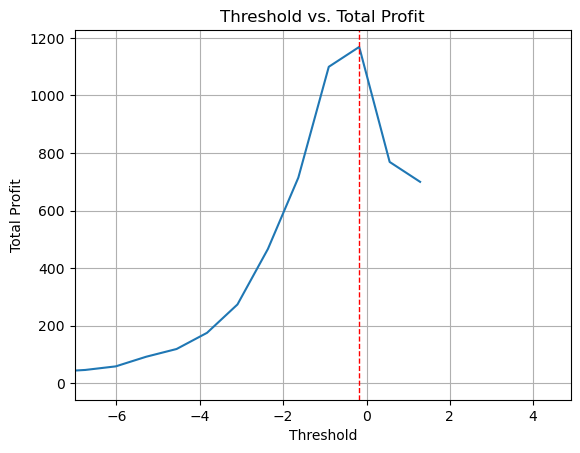

In [222]:
#threshold vs profit (all_total_profit)
plt.plot(np.linspace(test_scores.min(), test_scores.max(), 100), all_total_profit)
plt.gca().set(xlim=(-7,None))
plt.grid(True)
plt.axvline(x = best_t, color = 'red', linestyle = '--', lw = 1)
plt.xlabel("Threshold")
plt.ylabel("Total Profit")
plt.title("Threshold vs. Total Profit")
plt.show()



# Part F: Evaluate Your Model From the Borrower’s Perspective

Is it more difficult for people in certain age groups to access credit under your proposed system?



/var/folders/1j/mlsnh9t96n70j2n5mmm9h9780000gn/T/ipykernel_11168/2421308665.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_rate_percent = X_test.groupby('age_cat')['decision'].mean() * 100
/Users/ddelgado/anaconda3/envs/ml-0451/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


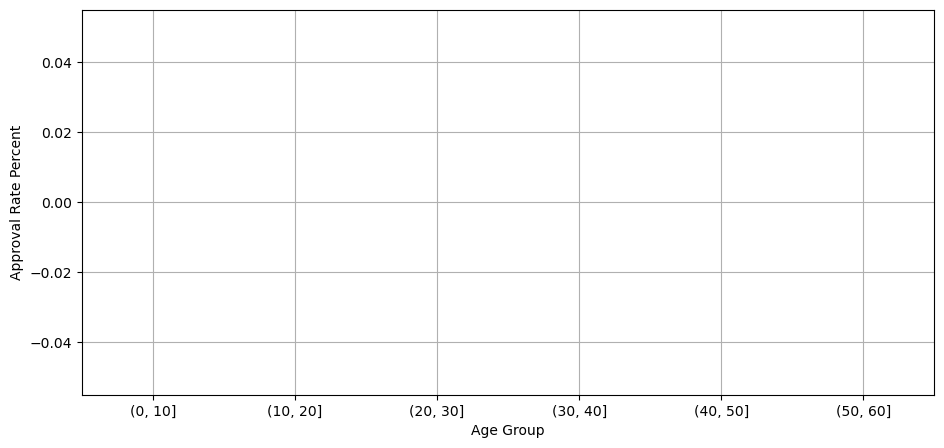

In [304]:
import seaborn as sns

X_test['age_cat'] = pd.cut(X_test['person_age'], range(0,70, 10))

approval_rate_percent = X_test.groupby('age_cat')['decision'].mean() * 100
plt.figure(figsize=(11,5))
sns.barplot(X_test, x = approval_rate_percent.index, y = approval_rate_percent.values)
plt.xlabel('Age Group')
plt.ylabel('Approval Rate Percent')
plt.grid(True)
plt.show()
#(X_test['person_age'], y_test)


Since, all of my decision column has the boolean true, they are all 0.0 floats. Therefore, no one age group has more difficulty in getting a loan in the proposed system. 

Is it more difficult for people to get loans in order to pay for medical expenses? How does this compare with the actual rate of default in that group? What about people seeking loans for business ventures or education?

In [323]:
loan_intent_rate = X_test.groupby(['loan_intent_EDUCATION', 'loan_intent_MEDICAL', 'loan_intent_VENTURE']).aggregate({'decision' : 'mean', 'cb_person_default_on_file_N' : 'mean', 'cb_person_default_on_file_Y' : 'mean'})
print(loan_intent_rate)

                                                               decision  \
loan_intent_EDUCATION loan_intent_MEDICAL loan_intent_VENTURE             
False                 False               False                     0.0   
                                          True                      0.0   
                      True                False                     0.0   
True                  False               False                     0.0   

                                                               cb_person_default_on_file_N  \
loan_intent_EDUCATION loan_intent_MEDICAL loan_intent_VENTURE                                
False                 False               False                                   0.809770   
                                          True                                    0.816390   
                      True                False                                   0.835974   
True                  False               False                                

Since the decision column is all zeros, the comparison here is that the approval rate, or the decision, is less than the actual default rate for each education, medical and venture groups.

How does a person’s income level impact the ease with which they can access credit under your decision system?

In [338]:
#income_groups = pd.cut(X_test['person_income'], range(4800,1782000, 10))
approval_rate_income = X_test.groupby(pd.cut(X_test['person_income'], 25))['decision'].mean()
print(approval_rate_income)

person_income
(3022.8, 75888.0]         0.0
(75888.0, 146976.0]       0.0
(146976.0, 218064.0]      0.0
(218064.0, 289152.0]      0.0
(289152.0, 360240.0]      0.0
(360240.0, 431328.0]      0.0
(431328.0, 502416.0]      0.0
(502416.0, 573504.0]      0.0
(573504.0, 644592.0]      NaN
(644592.0, 715680.0]      0.0
(715680.0, 786768.0]      0.0
(786768.0, 857856.0]      0.0
(857856.0, 928944.0]      NaN
(928944.0, 1000032.0]     NaN
(1000032.0, 1071120.0]    NaN
(1071120.0, 1142208.0]    NaN
(1142208.0, 1213296.0]    0.0
(1213296.0, 1284384.0]    NaN
(1284384.0, 1355472.0]    NaN
(1355472.0, 1426560.0]    NaN
(1426560.0, 1497648.0]    NaN
(1497648.0, 1568736.0]    NaN
(1568736.0, 1639824.0]    NaN
(1639824.0, 1710912.0]    NaN
(1710912.0, 1782000.0]    0.0
Name: decision, dtype: float64


/var/folders/1j/mlsnh9t96n70j2n5mmm9h9780000gn/T/ipykernel_11168/4155170202.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_rate_income = X_test.groupby(pd.cut(X_test['person_income'], 25))['decision'].mean()


A person’s income level does not impact the ease in which a person can access credit under the decision system as the decision says the mean is 0.0

# **Conclusion**

In this blog post, what I learned was that something in my decisions might be calculated wrong or I might be missing something as all of my decisions say they are True for defaulting. If everything is correct, I learned that everyone is set to default on the loan, so there really is no difference between groups of people.

Considering that people seeking loans for medical expense have high rates of default, is it fair that it is more difficult for them to obtain access to credit?

- Assuming my data showed that people seeking loans for medical expenses have higher rates of defaulting, I believe that it is fair for them to have more difficulty in obtaining access to credit. In this sense, it is fair because the bank has to think in terms of itself and if the people who seek medical expenses cannot pay the loan back, it is fair for the bank to deny their loan as it is money the bank will be losing. If something is fair, it does not mean it is morally correct. In this case, fairness is based on the system proposed and if a borrower falls into the given threshold for loan acceptance based on different factors. However, I would say it is not fair according to morals to deny the loan for their medical expenses as they need the money to get treatment/medication in order to remain alive.